In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

#Part 2e
# x= np.zeros(N)
# y= np.zeros(N)
N=504 #using N from Q3
b= np.zeros(N+1)
a= np.zeros(N+1)
gamma = 0.94
product = np.zeros(N)
inner_product = np.zeros(N)
w_mean = np.zeros(N)

beta = (1-gamma)/(1-gamma**N)
alpha = (1-gamma**2)/(2*gamma*(1-gamma**(N-1)))

print(beta)
print(alpha)

for i in range(1,N):
    b[i]= beta*gamma**(i-1)
    a[i]= alpha*gamma**(i-1)

b= b[1:(N+1)]
a= a[1:(N+1)]
# print(a[1:5])
# print(b[1:5])

#check for unbiasedness 
print(sum(b))
print(sum(a)-2*np.dot(a,b)+sum(a)*np.dot(b,b))

def weighted_mean(x):
    for i in range (0,len(x)):
        w_mean[i] = x[i]*b[i]
    #print(weighted_mean)
    return sum(w_mean)
 
def weighted_cov(x,y):
    x_adj= x-weighted_mean(x)
    y_adj= y-weighted_mean(y)
    for i in range (0,len(x)):
        inner_product[i] = x_adj[i]*y_adj[i] 
    weighted_covar= np.dot(a,inner_product)
    #print(weighted_cov)
    return weighted_covar

def weighted_var(x):
    x_adj= x-weighted_mean(x)
    for i in range (0,len(x)):
        product[i] = x_adj[i]**2 
    #print(product)
    #diag = product.diagonal()                  
    weighted_var= np.dot(a,product)
    #print(weighted_var)
    return weighted_var

C:\Users\Elise Nguyen\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


0.060000000000001774
0.061914893617023195
0.9999999999999991
0.9999999999999951


In [2]:
#Q3a+b
import timeit
start = dt.datetime(2018,3,13)
end = dt.datetime(2020,3,13)

GGL = data.DataReader('GOOGL', 'yahoo', start, end)
FB = data.DataReader('FB', 'yahoo', start, end)

N = len(GGL.Close)

GGL.to_csv('GOOGL data.csv')
FB.to_csv('FB data.csv')

#Q3c
r_GGL = np.log(GGL.Close) - np.log(GGL.Close.shift(1))
r_GGL=r_GGL[1:N]
#print(r_GGL.head())

r_FB = np.log(FB.Close) - np.log(FB.Close.shift(1))
r_FB = r_FB[1:N]

start = timeit.default_timer()
 
print('Average Google exponentially weighted volatilities is '+ str(weighted_mean(r_GGL)))
print('Average FB exponentially weighted volatilities is '+ str(weighted_mean(r_FB)))
print('Varianace of Google exponentially weighted volatilities is '+str(weighted_var(r_GGL)))
print('Varianace of FB exponentially weighted volatilities is '+str(weighted_var(r_FB)))
weighted_cov(r_GGL,r_FB)

corr = weighted_cov(r_GGL,r_FB)/(np.sqrt(weighted_var(r_GGL))*np.sqrt(weighted_var(r_FB)))
print('Exponentially weighted correlations between FB and GGL is'+ str(corr))

stop = timeit.default_timer()
print('Time: ', stop - start) 
#print(r_GGL.head(5))

Average Google exponentially weighted volatilities is -0.0038866087209447286
Average FB exponentially weighted volatilities is -0.004481467087578848
Varianace of Google exponentially weighted volatilities is 0.00039212174731727924
Varianace of FB exponentially weighted volatilities is 0.0007279990264326255
Exponentially weighted correlations between FB and GGL is0.767799194549069
Time:  0.13647169999603648


In [4]:
#Q3d
start1 = timeit.default_timer()
r_GGL_ewm = r_GGL.ewm(alpha = 0.06)
r_GGL_ewm_mean= r_GGL_ewm.mean().iloc[N-2]
r_GGL_ewm_var = r_GGL_ewm.var().iloc[N-2]

r_FB_ewm = r_FB.ewm(alpha = 0.06)
r_FB_ewm_mean= r_FB_ewm.mean().iloc[N-2]
r_FB_ewm_var = r_FB_ewm.var().iloc[N-2]

r = pd.concat([r_GGL,r_FB], axis=1).ewm(alpha = 0.06)

print('Average Google exponentially weighted volatilities is '+ str(r_GGL_ewm_mean))
print('Average FB exponentially weighted volatilities is '+ str(r_FB_ewm_mean))
print('Varianace of Google exponentially weighted volatilities is '+str(r_GGL_ewm_var))
print('Variance of FB exponentially weighted volatilities is ' +str(r_FB_ewm_var))
print('Exponentially weighted correlation between FB and GGL is '+ str(r.corr().iloc[1007,0]))

#r1.evm(alpha=0.06).corr(r2.evm(alpha=0.06))
print(r_GGL_ewm.corr(r_FB_ewm))
stop1 = timeit.default_timer()
print('Time: ', stop1 - start1) 

#I don't get the same result as 3c

Average Google exponentially weighted volatilities is -0.006827973680417183
Average FB exponentially weighted volatilities is -0.007778087891203603
Varianace of Google exponentially weighted volatilities is 0.001809719075747295
Variance of FB exponentially weighted volatilities is 0.002019644194167219
Exponentially weighted correlation between FB and GGL is 0.9524061702090801
Date
2018-03-14         NaN
2018-03-15    1.000000
2018-03-16    0.155185
2018-03-19    0.852336
2018-03-20    0.800115
                ...   
2020-03-09    0.861106
2020-03-10    0.890089
2020-03-11    0.900205
2020-03-12    0.928077
2020-03-13    0.952406
Name: Close, Length: 504, dtype: float64
Time:  0.01730719998886343


Max correlation is 1.0
Min correlation is 0.11138693323954689
Latest correlation is 0.9524061702090801
Max GGL EW vol is 0.007846929705638495
Min GGL EW vol is -0.014495081488409658
Latest GGL EW vol is -0.006827973680417183
Max FB EW vol is 0.012620690982686256
Min FB EW vol is -0.019477515372586962
Latest FB EW vol is -0.007778087891203603


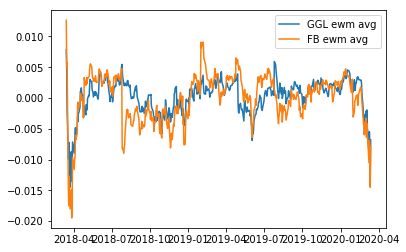

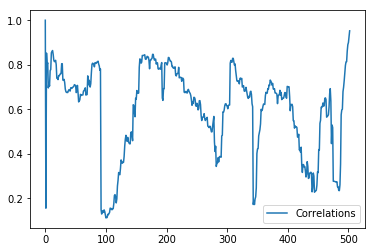

In [252]:
#Part 4
r_corr = [r.corr().iloc[i*2+1,0] for i in range(1,504)]
print('Max correlation is '+str(np.max(r_corr)))
print('Min correlation is '+str(np.min(r_corr)))
print('Latest correlation is '+str(r_corr[502]))

plt.figure(1) 
#plt.plot(r_corr,label ='Correlations')
plt.plot(r_GGL_ewm.mean(),label = 'GGL ewm avg')
#plt.legend()
print("Max GGL EW vol is "+ str(np.max(r_GGL_ewm.mean())))
print("Min GGL EW vol is "+ str(np.min(r_GGL_ewm.mean())))
print("Latest GGL EW vol is "+ str(r_GGL_ewm.mean().iloc[N-2]))
 
plt.plot(r_FB_ewm.mean(),label = 'FB ewm avg')
plt.legend()
print("Max FB EW vol is "+ str(np.max(r_FB_ewm.mean())))
print("Min FB EW vol is "+ str(np.min(r_FB_ewm.mean())))
print("Latest FB EW vol is "+ str(r_FB_ewm.mean().iloc[N-2]))

plt.figure(2) 
plt.plot(r_corr,label ='Correlations')
plt.legend()